In [43]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,  Dropout
import joblib

In [44]:
df = pd.read_csv("ObesityDataSet.csv")
print(df.shape)
df.head()

(2111, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [45]:
cat_features = df.select_dtypes(include = ['object'])
cat_features.columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [46]:
le = LabelEncoder()
for i in cat_features:
    df[i] = le.fit_transform(df[i])

In [47]:
X = df.drop('NObeyesdad', axis=1) 
y = df['NObeyesdad']

train score: 0.9729180932044983
test score: 0.9542586803436279


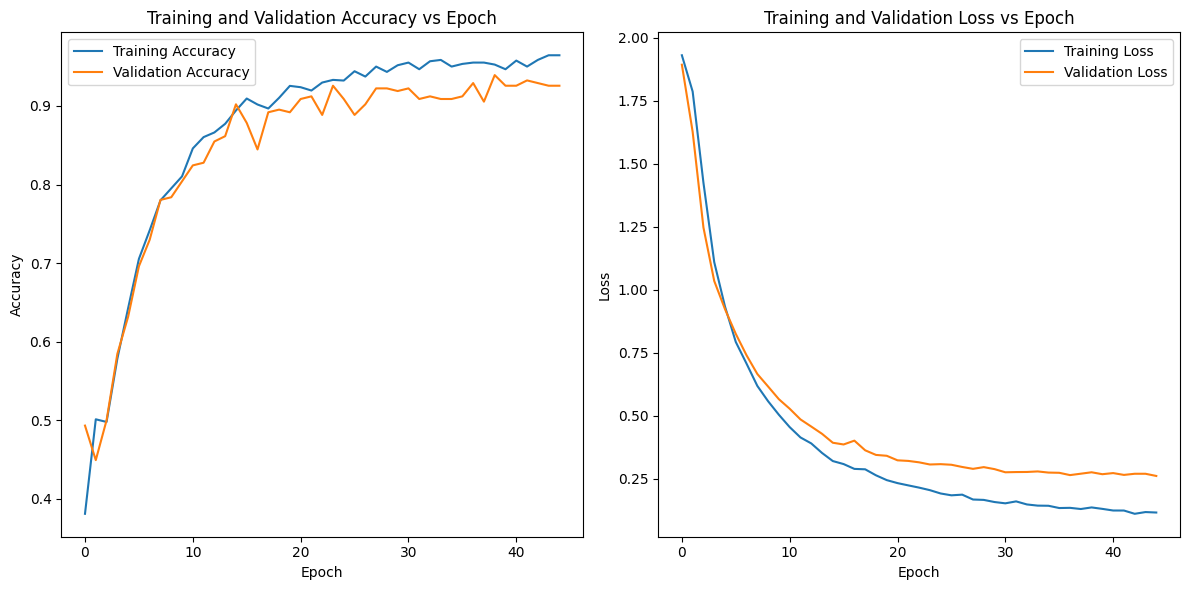

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_ANN = Sequential()
model_ANN.add(Dense(64, kernel_initializer='uniform', activation='relu', input_shape=(X_train.shape[1],)))
model_ANN.add(Dropout(0.1))
model_ANN.add(Dense(64, kernel_initializer='uniform', activation='relu'))
model_ANN.add(Dropout(0.1))
model_ANN.add(Dense(7, kernel_initializer='uniform', activation='softmax'))

model_ANN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_ANN.fit(X_train_scaled, y_train, epochs=45, batch_size=45, verbose=0, validation_split=0.2)

train_score = model_ANN.evaluate(X_train_scaled, y_train, verbose=0)[1]  # Accuracy is at index 1
test_score = model_ANN.evaluate(X_test_scaled, y_test, verbose=0)[1]  # Accuracy is at index 1

print("train score: " + str(train_score))
print("test score: " + str(test_score))

# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs Epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [49]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# model_ANN = Sequential()
# model_ANN.add(Dense(64, kernel_initializer = 'uniform', activation='relu', input_shape=(X_train.shape[1],)))
# model_ANN.add(Dropout(0.4))
# model_ANN.add(Dense(64, kernel_initializer = 'uniform', activation='relu'))
# model_ANN.add(Dropout(0.4))
# model_ANN.add(Dense(7, kernel_initializer = 'uniform', activation='softmax'))

# model_ANN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# # y_train = to_categorical(y_train)
# model_ANN.fit(X_train_scaled, y_train, epochs=45, batch_size=45, verbose=1)

# train_score = model_ANN.evaluate(X_train_scaled, y_train, verbose=0)[1]  # Accuracy is at index 1
# test_score = model_ANN.evaluate(X_test_scaled, y_test, verbose=0)[1]  # Accuracy is at index 1

# print("train score: " + str(train_score))
# print("test score: " + str(test_score))

In [50]:
# Save the trained model to a file
joblib.dump(model_ANN, 'ANN.pkl')

['ANN.pkl']

In [51]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict probabilities for training and test set
y_pred_train_probs = model_ANN.predict(X_train_scaled)
y_pred_test_probs = model_ANN.predict(X_test_scaled)

# Convert probabilities to class labels by selecting the class with the highest probability
y_pred_train = np.argmax(y_pred_train_probs, axis=1)
y_pred_test = np.argmax(y_pred_test_probs, axis=1)

# Calculate classification report for training set
report_train = classification_report(y_train, y_pred_train)

# Calculate classification report for test set
report_test = classification_report(y_test, y_pred_test)

print("Classification Report for Training Set:")
print(report_train)

print("\nClassification Report for Test Set:")
print(report_test)

20/20 [==============================] - 0s 833us/step
Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       184
           1       0.96      0.94      0.95       201
           2       1.00      0.99      0.99       235
           3       0.99      0.98      0.99       196
           4       1.00      1.00      1.00       238
           5       0.91      0.97      0.94       210
           6       0.99      0.93      0.96       213

    accuracy                           0.97      1477
   macro avg       0.97      0.97      0.97      1477
weighted avg       0.97      0.97      0.97      1477


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        88
           1       0.95      0.85      0.90        86
           2       0.97      0.98      0.98       116
           3       1.00      0.99      1.00       101


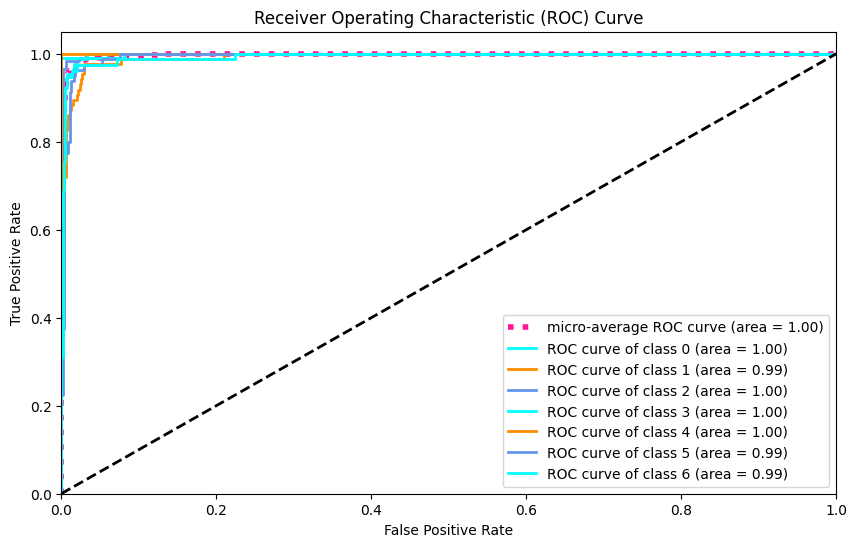

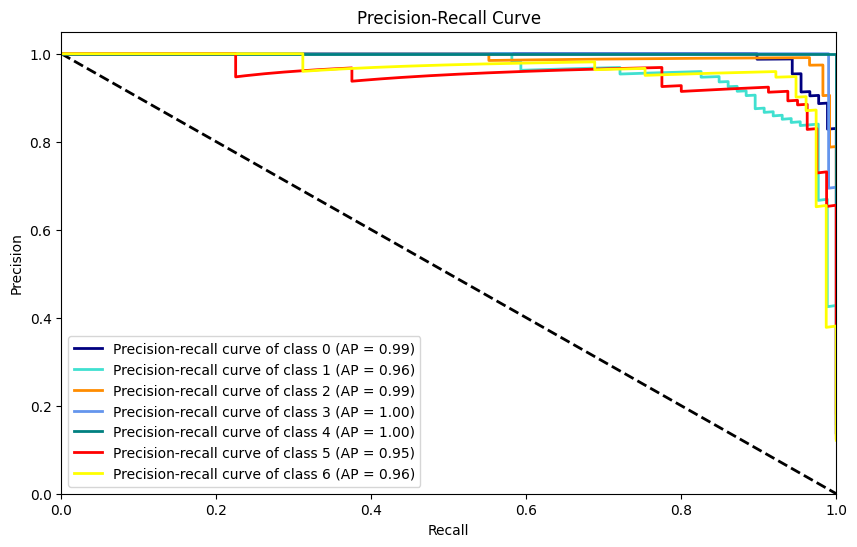

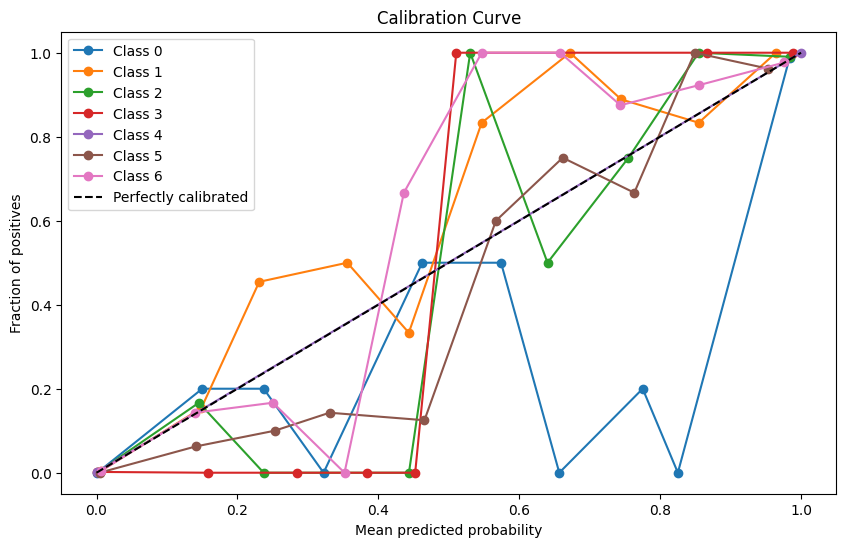

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.calibration import calibration_curve
from sklearn.preprocessing import label_binarize
from itertools import cycle

def plot_roc_curve(y_true, y_probabilities, n_classes):
    # Binarize the labels
    y_true_bin = label_binarize(y_true, classes=range(n_classes))
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_probabilities[:, i])
        roc_auc[i] = roc_auc_score(y_true_bin[:, i], y_probabilities[:, i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_probabilities.ravel())
    roc_auc["micro"] = roc_auc_score(y_true_bin, y_probabilities, average="micro")

    # Plot ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

def plot_precision_recall_curve(y_true, y_probabilities, n_classes):
    # Binarize the labels
    y_true_bin = label_binarize(y_true, classes=range(n_classes))
    
    # Compute precision-recall curve and average precision for each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], y_probabilities[:, i])
        average_precision[i] = average_precision_score(y_true_bin[:, i], y_probabilities[:, i])

    # Plot precision-recall curve
    plt.figure(figsize=(10, 6))
    plt.plot([0, 1], [1, 0], 'k--', lw=2)
    colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(recall[i], precision[i], color=color, lw=2,
                 label='Precision-recall curve of class {0} (AP = {1:0.2f})'
                 ''.format(i, average_precision[i]))

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

def plot_calibration_curve(y_true, y_probabilities, n_classes):
    # Binarize the labels
    y_true_bin = label_binarize(y_true, classes=range(n_classes))
    
    # Plot calibration curve
    plt.figure(figsize=(10, 6))
    for i in range(n_classes):
        prob_true, prob_pred = calibration_curve(y_true_bin[:, i], y_probabilities[:, i], n_bins=10)
        plt.plot(prob_pred, prob_true, marker='o', label=f'Class {i}')
    plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
    plt.xlabel('Mean predicted probability')
    plt.ylabel('Fraction of positives')
    plt.title('Calibration Curve')
    plt.legend()
    plt.show()

# # Assuming you have your classifier clf, test features X_test, and true labels y_test
# y_probabilities = clf.predict_proba(X_test)
# y_pred = clf.predict(X_test)

# Assuming n_classes is the number of classes in your classification problem
n_classes = 7
plot_roc_curve(y_test, y_pred_test_probs, n_classes)
plot_precision_recall_curve(y_test, y_pred_test_probs, n_classes)
plot_calibration_curve(y_test, y_pred_test_probs, n_classes)

